### Project Question 1: 
Compare the two datasets to look for trends and find the top countries based on combined happiness/freedom metrics.

In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
freedom_data = "starting_data/freedom.csv"
happiness_data = "starting_data/happiness.csv"
kaggle_data = "starting_data/kaggle.csv"

freedom_df = pd.read_csv(freedom_data)
happiness_df = pd.read_csv(happiness_data)

kaggle_df = pd.read_csv(kaggle_data)
kaggle_df = kaggle_df.loc[kaggle_df['year'] == 2016]
kaggle_df = kaggle_df[["countries","hf_score"]]
kaggle_df.columns = ["Country", "Human Freedom"]

freedom_df.columns=["Country", "Personal Freedom","Economic Freedom"]

freedom_and_happiness = pd.merge(freedom_df,happiness_df, on="Country")
freedom_and_happiness = pd.merge(freedom_and_happiness,kaggle_df, on="Country")

freedom_and_happiness["Happiness score"] = round(freedom_and_happiness["Happiness score"],2)
freedom_and_happiness["Human Freedom"] = round(freedom_and_happiness["Human Freedom"],2)


freedom_and_happiness.head()

,Country,Personal Freedom,Economic Freedom,Happiness score,Human Freedom
0,Netherlands,9.40,7.71,7.49,8.55
1,Norway,9.34,7.60,7.55,8.47
2,Sweden,9.33,7.44,7.34,8.39
3,Denmark,9.33,7.77,7.60,8.55
4,Finland,9.29,7.65,7.77,8.47


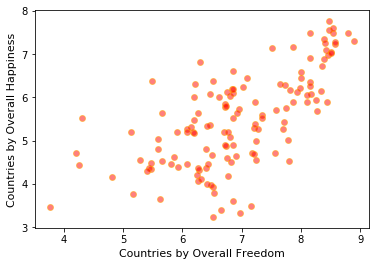

In [31]:
# Scatterplot displaying overall freedom (x) and overall happiness (y)
x_limit = 10
y_limit = 10

plt.scatter(
    x=freedom_and_happiness["Human Freedom"], 
    y=freedom_and_happiness["Happiness score"], 
    marker="o", 
    facecolors="red", 
    edgecolors="orange", 
    alpha=0.50
)

# plt.title("Freedom and Happiness Plotted by Country")
plt.ylabel("Countries by Overall Happiness", fontsize=11)
plt.xlabel("Countries by Overall Freedom", fontsize=11)
plt.savefig("q1_scatter.png")

plt.show()

In [5]:
# Add Human Freedom Score + Happiness Score
# Add Combined Score column to dataframe
freedom_and_happiness["Combined Score"] = freedom_and_happiness["Happiness score"] + freedom_and_happiness["Human Freedom"]
freedom_and_happiness.head()

,Country,Personal Freedom,Economic Freedom,Happiness score,Human Freedom,Combined Score
0,Netherlands,9.40,7.71,7.49,8.55,16.04
1,Norway,9.34,7.60,7.55,8.47,16.02
2,Sweden,9.33,7.44,7.34,8.39,15.73
3,Denmark,9.33,7.77,7.60,8.55,16.15
4,Finland,9.29,7.65,7.77,8.47,16.24


In [6]:
# Sort dataframe by Combined Score:
Sorted_Countries = freedom_and_happiness.sort_values(["Combined Score"], ascending=False)
Sorted_Countries.head()

,Country,Personal Freedom,Economic Freedom,Happiness score,Human Freedom,Combined Score
9,Switzerland,9.19,8.39,7.48,8.79,16.27
4,Finland,9.29,7.65,7.77,8.47,16.24
5,New Zealand,9.28,8.49,7.31,8.89,16.20
3,Denmark,9.33,7.77,7.60,8.55,16.15
0,Netherlands,9.40,7.71,7.49,8.55,16.04


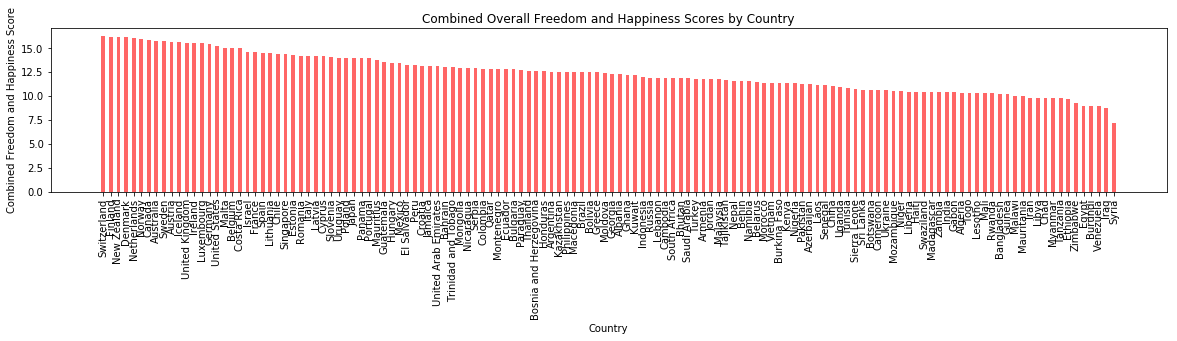

In [51]:
# Bar chart displaying countries by combined score:

x_axis=Sorted_Countries["Country"]
y_axis=Sorted_Countries["Combined Score"]

# plt.figure(figsize=(100, 20))

plt.bar(
    x_axis, 
    y_axis, 
    color = "red",
    alpha=0.60,
    align="center",
    width=0.5
)

plt.xticks(
    x_axis, 
    Sorted_Countries["Country"], 
    rotation="vertical"
    )

# Set a Title and labels
plt.title("Combined Overall Freedom and Happiness Scores by Country")
plt.ylabel("Combined Freedom and Happiness Score")
plt.xlabel("Country")
#plt.tight_layout()
plt.rcParams["figure.figsize"] = (50, 2)
# plt.show()

In [8]:
# Create Dataframe for Country and Combined Score only:
high_low_scores = Sorted_Countries[["Country", "Combined Score"]]
high_low_scores.head()

,Country,Combined Score
9,Switzerland,16.27
4,Finland,16.24
5,New Zealand,16.20
3,Denmark,16.15
0,Netherlands,16.04


In [9]:
top_how_many = 10
hl_head_df = high_low_scores.head(top_how_many)#iloc[  :5]#:-1]
hl_tail_df = high_low_scores.tail(top_how_many)#iloc[  -6:]
#high_low_scores.loc[[9]]
hl_top_bottom_df = pd.concat([hl_head_df, hl_tail_df])
hl_top_bottom_df.head()

,Country,Combined Score
9,Switzerland,16.27
4,Finland,16.24
5,New Zealand,16.20
3,Denmark,16.15
0,Netherlands,16.04


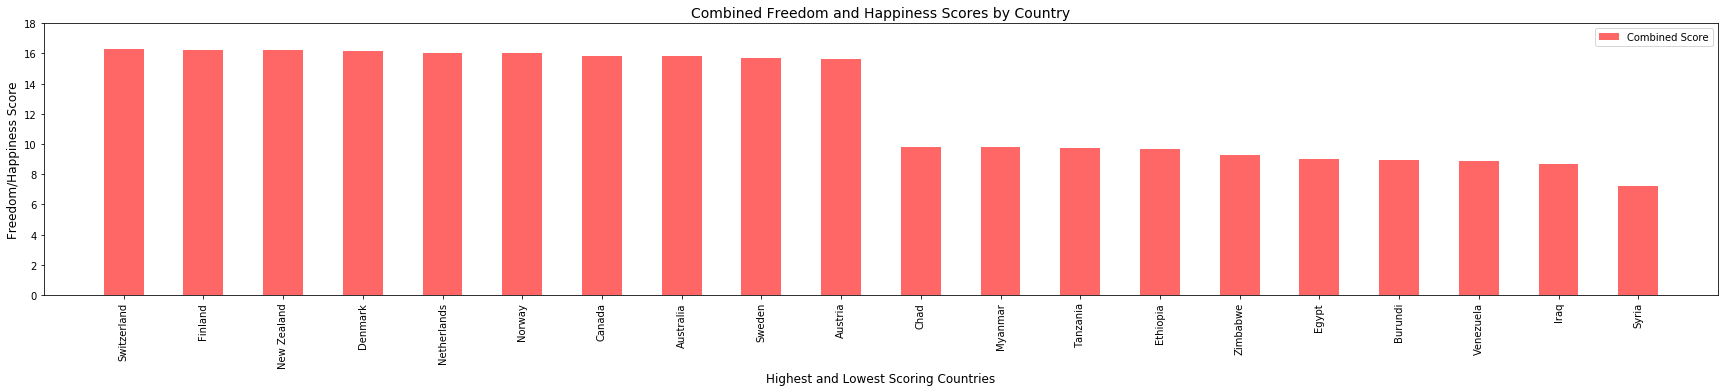

In [10]:
multiplot = hl_top_bottom_df.plot(
    kind="bar", 
    color='r', 
    alpha=0.6, 
    align="center")

multiplot.set_xticklabels(hl_top_bottom_df["Country"])

plt.title("Combined Freedom and Happiness Scores by Country", fontsize=14)
plt.ylabel("Freedom/Happiness Score", fontsize=12)
plt.xlabel("Highest and Lowest Scoring Countries", fontsize=12)

plt.rcParams["figure.figsize"] = (20, 3)
plt.xlim(-1.0, len(np.arange(len(hl_top_bottom_df))))
plt.ylim(0, 18)
plt.savefig("q1_country_scores.png")
plt.show()

In [11]:
import gmaps
from geocode_config import gkey
gmaps.configure(gkey)

In [12]:
# import csv and save to dataframe:
country_capitals_df = pd.read_csv("starting_data/country_capitals.csv")
country_capitals_df.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,Unnamed: 6
0,Somaliland,Hargeisa,9.55,44.050000,NaN,Africa,NaN
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica,NaN
2,French Southern and Antarctic Lands,Port-aux-Français,-49.35,70.216667,TF,Antarctica,NaN
3,Palestine,Jerusalem,31.76666667,35.233333,PS,Asia,NaN
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe,NaN


In [13]:
# merge dataframes on Country Name
country_capitals_df = country_capitals_df.rename(columns={
    "CountryName": "Country"
})

merged_dataset = pd.merge(
    Sorted_Countries, 
    country_capitals_df, 
    on="Country", 
    how="left")

merged_dataset.head()

,Country,Personal Freedom,Economic Freedom,Happiness score,Human Freedom,Combined Score,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName,Unnamed: 6
0,Switzerland,9.19,8.39,7.48,8.79,16.27,Bern,46.91666667,7.466667,CH,Europe,NaN
1,Finland,9.29,7.65,7.77,8.47,16.24,Helsinki,60.16666667,24.933333,FI,Europe,NaN
2,New Zealand,9.28,8.49,7.31,8.89,16.20,Wellington,-41.3,174.783333,NZ,Australia,NaN
3,Denmark,9.33,7.77,7.60,8.55,16.15,Copenhagen,55.66666667,12.583333,DK,Europe,NaN
4,Netherlands,9.40,7.71,7.49,8.55,16.04,Amsterdam,52.35,4.916667,NL,Europe,NaN


In [14]:
len(merged_dataset)
len(Sorted_Countries)
len(country_capitals_df)
merged_dataset.dtypes

Country              object
Personal Freedom    float64
Economic Freedom    float64
Happiness score     float64
Human Freedom       float64
Combined Score      float64
CapitalName          object
CapitalLatitude      object
CapitalLongitude    float64
CountryCode          object
ContinentName        object
Unnamed: 6           object
dtype: object

In [15]:
# Convert Latitude to float
merged_dataset["CapitalLatitude"] = merged_dataset["CapitalLatitude"].astype("float")

In [16]:
merged_dataset.dtypes

Country              object
Personal Freedom    float64
Economic Freedom    float64
Happiness score     float64
Human Freedom       float64
Combined Score      float64
CapitalName          object
CapitalLatitude     float64
CapitalLongitude    float64
CountryCode          object
ContinentName        object
Unnamed: 6           object
dtype: object

In [17]:
# Create a combined score heatmap layer
fig = gmaps.figure()
freedom_happiness_heatmap_layer = gmaps.heatmap_layer(
    merged_dataset[["CapitalLatitude", "CapitalLongitude"]],
    weights=merged_dataset["Combined Score"],
    dissipating=False,
    max_intensity=30,
    point_radius=5
)

fig.add_layer(freedom_happiness_heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

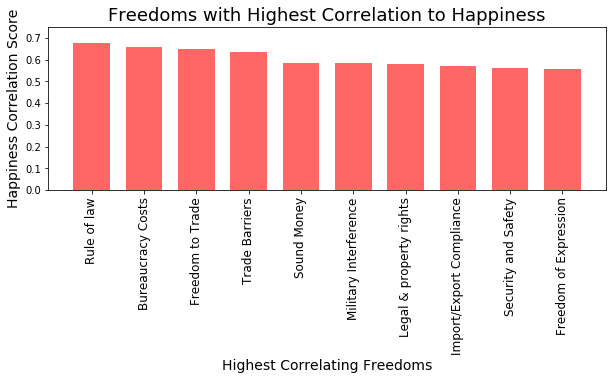

In [50]:
# Chart highest correlating freedoms
# y-axis: 
users = [13000, 26000, 52000, 30000, 9000]
users = [0.674790, 
         0.655803, 
         0.647011, 
         0.633812, 
         0.585567, 
         0.585315, 
         0.581422, 
         0.569279, 
         0.559996, 
         0.558508]

x_axis = np.arange(len(users))

plt.bar(
    x_axis, 
    users, 
    color='r', 
    alpha=0.6, 
    width=.7,
    align="center")

plt.xticks(x_axis, ["Rule of law", 
    "Bureaucracy Costs", 
    "Freedom to Trade",
    "Trade Barriers",
    "Sound Money",
    "Military Interference",
    "Legal & property rights",
    "Import/Export Compliance",
    "Security and Safety",
    "Freedom of Expression"])

# plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, 0.75)

plt.title("Freedoms with Highest Correlation to Happiness", fontsize=18)
plt.xlabel("Highest Correlating Freedoms", fontsize=14)
plt.ylabel("Happiness Correlation Score", fontsize=14)
plt.xticks(rotation="vertical", fontsize=12)
plt.rcParams["figure.figsize"] = (20, 3)
plt.savefig("q3_freedom_correlations.png")
plt.show()